<a href="https://colab.research.google.com/github/Rohit1208/PYTHON/blob/main/FITBIT_EDA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/FitBit data.csv')

In [4]:
df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.110000,7.110000,0.0,2.57,0.46,4.07,0.00,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.550000,11.550000,0.0,6.92,0.73,3.91,0.00,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.530000,8.530000,0.0,4.66,0.16,3.71,0.00,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.930000,8.930000,0.0,3.19,0.79,4.95,0.00,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.850000,7.850000,0.0,2.16,1.09,4.61,0.00,28,28,243,763,1886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,8877689391,4/8/2016,23014,20.389999,20.389999,0.0,11.10,0.63,8.62,0.00,70,29,359,982,4196
453,8877689391,4/9/2016,16470,8.070000,8.070000,0.0,0.00,0.02,8.02,0.00,90,9,289,1052,3841
454,8877689391,4/10/2016,28497,27.530001,27.530001,0.0,21.92,1.12,4.46,0.00,128,46,211,1055,4526
455,8877689391,4/11/2016,10622,8.060000,8.060000,0.0,1.47,0.15,6.37,0.01,18,7,225,1190,2820


In [5]:
df.shape

(457, 15)

In [6]:
df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,4.570000e+02,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,4.628595e+09,6546.562363,4.663523,4.609847,0.179427,1.180897,0.478643,2.890197,0.001904,16.623632,13.070022,170.070022,995.282276,2189.452954
std,2.293781e+09,5398.493064,4.082072,4.068540,0.849232,2.487159,0.830995,2.237523,0.008487,28.919704,36.208635,122.205372,337.021404,815.484523
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000
25%,2.347168e+09,1988.000000,1.410000,1.280000,0.000000,0.000000,0.000000,0.870000,0.000000,0.000000,0.000000,64.000000,728.000000,1776.000000
50%,4.057193e+09,5986.000000,4.090000,4.090000,0.000000,0.000000,0.020000,2.930000,0.000000,0.000000,1.000000,181.000000,1057.000000,2062.000000
75%,6.391747e+09,10198.000000,7.160000,7.110000,0.000000,1.310000,0.670000,4.460000,0.000000,25.000000,16.000000,257.000000,1285.000000,2667.000000
max,8.877689e+09,28497.000000,27.530001,27.530001,6.727057,21.920000,6.400000,12.510000,0.100000,202.000000,660.000000,720.000000,1440.000000,4562.000000


In [7]:
#check any null value is present or not?
df.isnull().sum()
#no null value is present

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [8]:
#the column tracker distance is some what related to the total distance travelled 
# by the person it's not much difference while comparing so remove the column
df.pop('TrackerDistance')


0       7.110000
1      11.550000
2       8.530000
3       8.930000
4       7.850000
         ...    
452    20.389999
453     8.070000
454    27.530001
455     8.060000
456     1.780000
Name: TrackerDistance, Length: 457, dtype: float64

In [9]:
#check the data frame after removing the column
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [10]:
# adding the year, month and date columns to the dataset so that we visualize accurately related to time and date
df['year'] = pd.DatetimeIndex(df['ActivityDate']).year
df['month'] = pd.DatetimeIndex(df['ActivityDate']).month
df['date'] = pd.DatetimeIndex(df['ActivityDate']).day
df['day'] = pd.DatetimeIndex(df['ActivityDate']).week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """


In [11]:
df.rename(columns={'day':'week'},inplace=True)

In [12]:
df.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,year,month,date,week
0,1503960366,3/25/2016,11004,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,2016,3,25,12
1,1503960366,3/26/2016,17609,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,2016,3,26,12
2,1503960366,3/27/2016,12736,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,2016,3,27,12
3,1503960366,3/28/2016,13231,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,2016,3,28,13
4,1503960366,3/29/2016,12041,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,2016,3,29,13
5,1503960366,3/30/2016,10970,7.16,0.0,2.36,0.51,4.29,0.0,30,13,223,1174,1820,2016,3,30,13
6,1503960366,3/31/2016,12256,7.86,0.0,2.29,0.49,5.04,0.0,33,12,239,820,1889,2016,3,31,13
7,1503960366,4/1/2016,12262,7.87,0.0,3.32,0.83,3.64,0.0,47,21,200,866,1868,2016,4,1,13
8,1503960366,4/2/2016,11248,7.25,0.0,3.00,0.45,3.74,0.0,40,11,244,636,1843,2016,4,2,13
9,1503960366,4/3/2016,10016,6.37,0.0,0.91,1.28,4.18,0.0,15,30,314,655,1850,2016,4,3,13


In [13]:
#to check the year present in the dataset
df['year'].value_counts()
#so it shows details of 2016 and it consider of 12 months

2016    457
Name: year, dtype: int64

In [14]:
#to check month
df['month'].value_counts()

4    383
3     74
Name: month, dtype: int64

In [15]:
df['date'].value_counts()

2     35
3     35
4     35
5     35
1     34
6     33
7     33
8     33
9     32
10    29
12    26
11    25
30    11
31    11
29    10
28     4
27     4
26     4
25     4
17     2
23     2
24     2
22     2
18     2
21     2
20     2
19     2
13     2
14     2
15     2
16     2
Name: date, dtype: int64

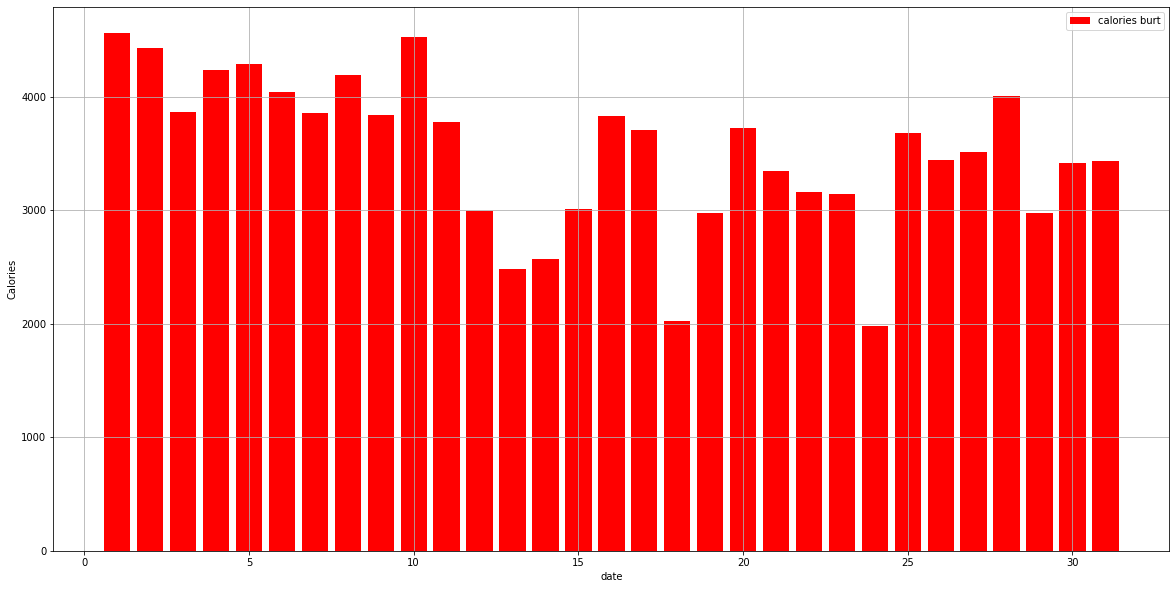

In [16]:
# In this chart you may analysis people start a work with energy after few days they slow down on work and again  some rise to energy and fe w withdraw fitness
plt.figure(figsize=(20,10))
plt.bar(df['date'],df['Calories'],color='red',label='calories burt')
plt.legend()
plt.xlabel('date')
plt.ylabel('Calories')
plt.grid()
plt.show()

In [17]:
#to check how many id of people present in the dataset
df2=df['Id'].value_counts()

In [18]:
df.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,year,month,date,week
0,1503960366,3/25/2016,11004,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,2016,3,25,12
1,1503960366,3/26/2016,17609,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,2016,3,26,12
2,1503960366,3/27/2016,12736,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,2016,3,27,12
3,1503960366,3/28/2016,13231,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,2016,3,28,13
4,1503960366,3/29/2016,12041,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,2016,3,29,13
5,1503960366,3/30/2016,10970,7.16,0.0,2.36,0.51,4.29,0.0,30,13,223,1174,1820,2016,3,30,13
6,1503960366,3/31/2016,12256,7.86,0.0,2.29,0.49,5.04,0.0,33,12,239,820,1889,2016,3,31,13
7,1503960366,4/1/2016,12262,7.87,0.0,3.32,0.83,3.64,0.0,47,21,200,866,1868,2016,4,1,13
8,1503960366,4/2/2016,11248,7.25,0.0,3.00,0.45,3.74,0.0,40,11,244,636,1843,2016,4,2,13
9,1503960366,4/3/2016,10016,6.37,0.0,0.91,1.28,4.18,0.0,15,30,314,655,1850,2016,4,3,13


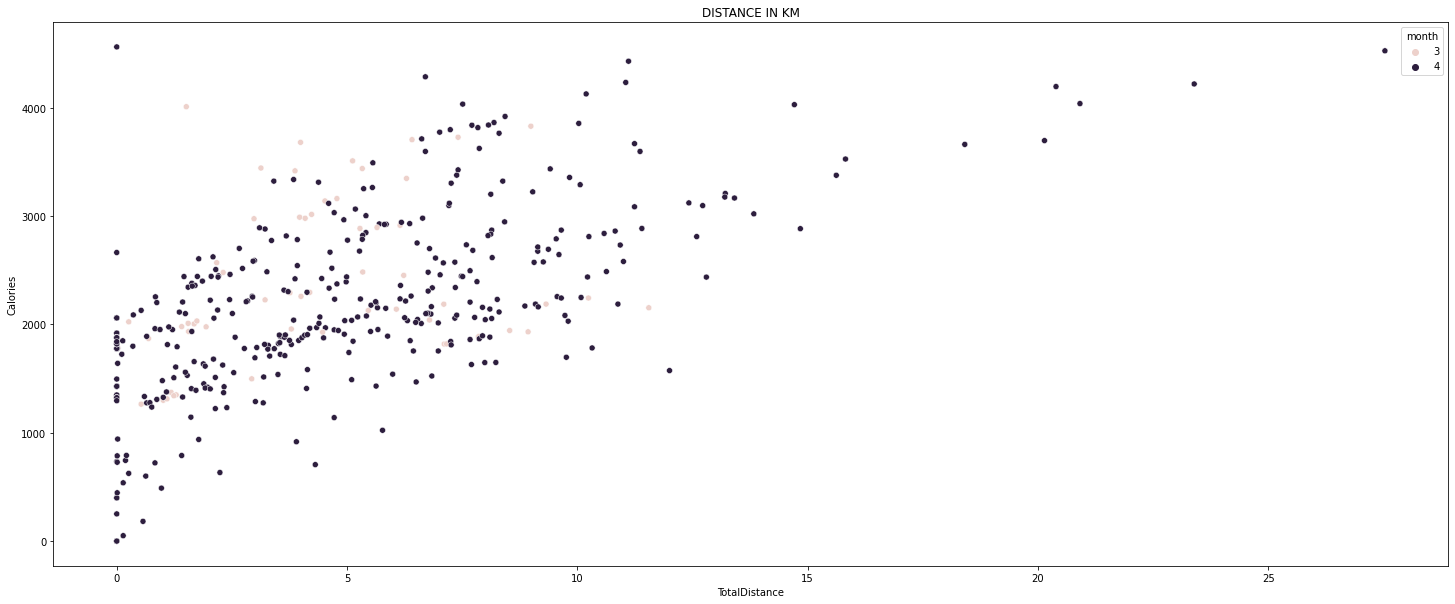

In [19]:
#Lets check distance much covered vs calories burnt
plt.figure(figsize=(25,10))
sns.scatterplot(x=df['TotalDistance'],y=df['Calories'],hue=df['month'])
plt.title('DISTANCE IN KM')
plt.show()

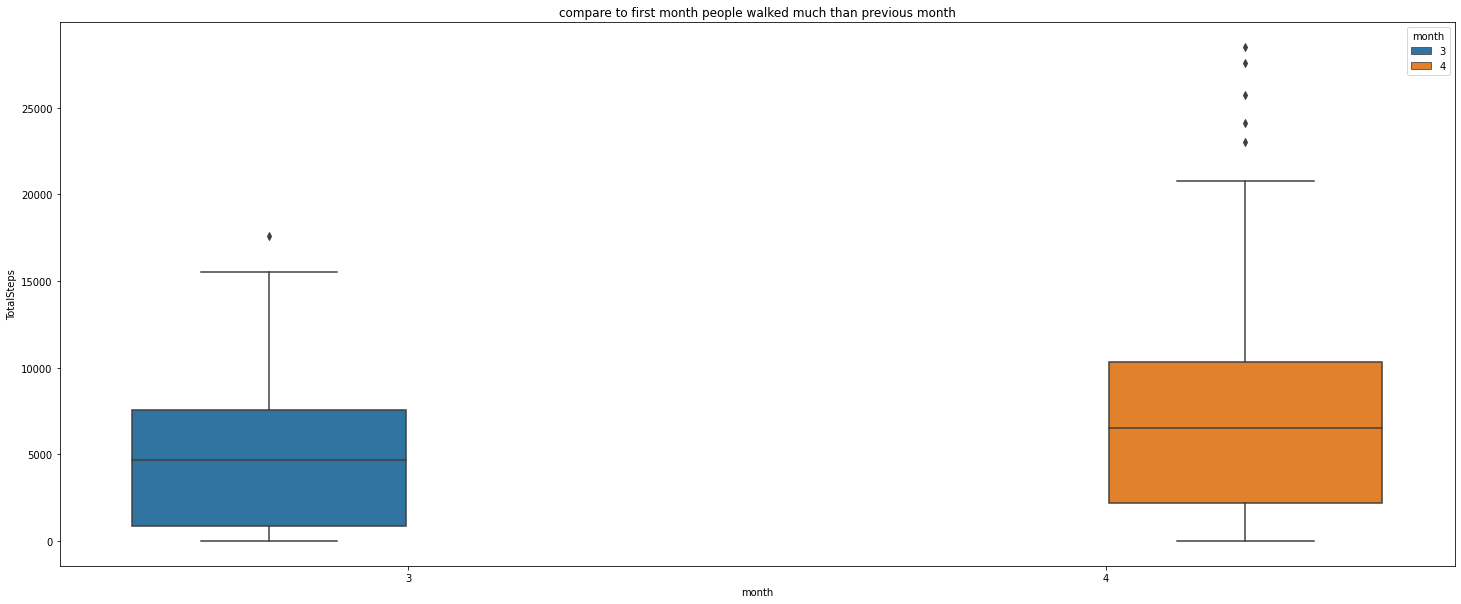

In [20]:
#compare to first month people walked much than previous month
plt.figure(figsize=(25,10))
sns.boxplot(x=df['month'],y=df['TotalSteps'],data=df,hue='month')
plt.title('compare to first month people walked much than previous month')
plt.show()

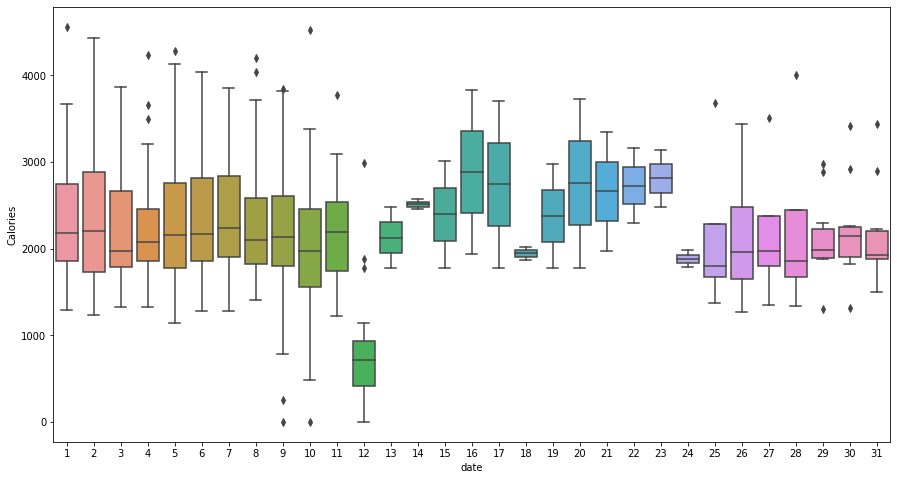

In [27]:
# Chart represent the following dataset of calories burnt per day  on average and also with min & max
plt.figure(figsize=(15,8))
sns.boxplot(x='date', y='Calories', data=df)



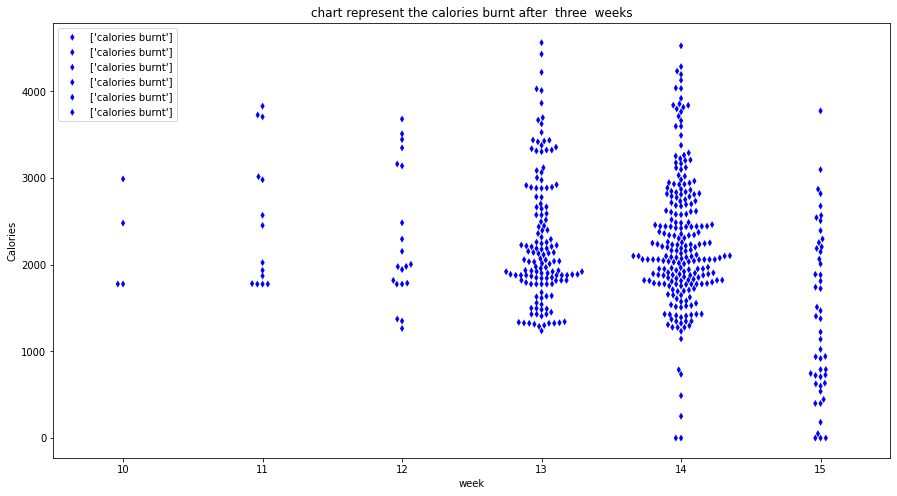

In [34]:
#this chart represent the calories burnt after  three  weeks  is high because continous excerzing the body will result you to the fit
plt.figure(figsize=(15,8))
sns.swarmplot(x='week', y='Calories', data=df, color="blue",marker='d',label=['calories burnt'])
plt.title('chart represent the calories burnt after  three  weeks')
plt.legend()
plt.show()

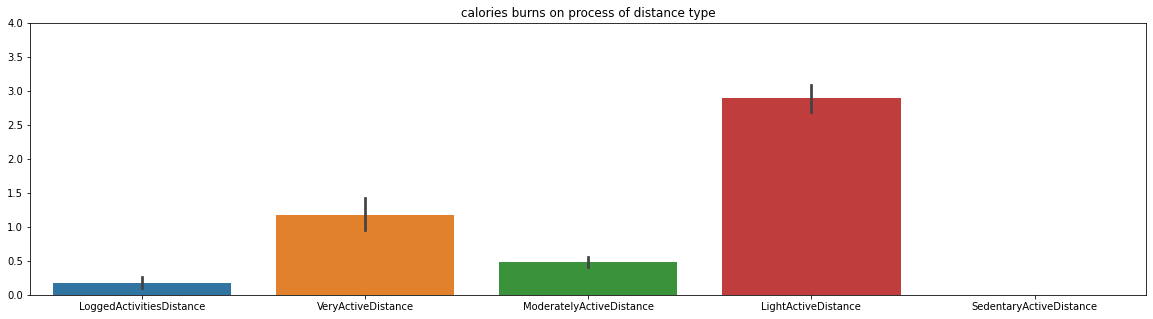

In [60]:
#calories burnts on process of distance and you will notice light active distance burnts more calories
df1 = df[['LoggedActivitiesDistance','VeryActiveDistance','ModeratelyActiveDistance','LightActiveDistance','SedentaryActiveDistance']]
plt.figure(figsize=(20,5))
plt.ylim(0,4)
sns.barplot(data=df1)
plt.title('calories burns on process of distance type')
plt.show()



In [ ]:
col_select = ['Calories','VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes']

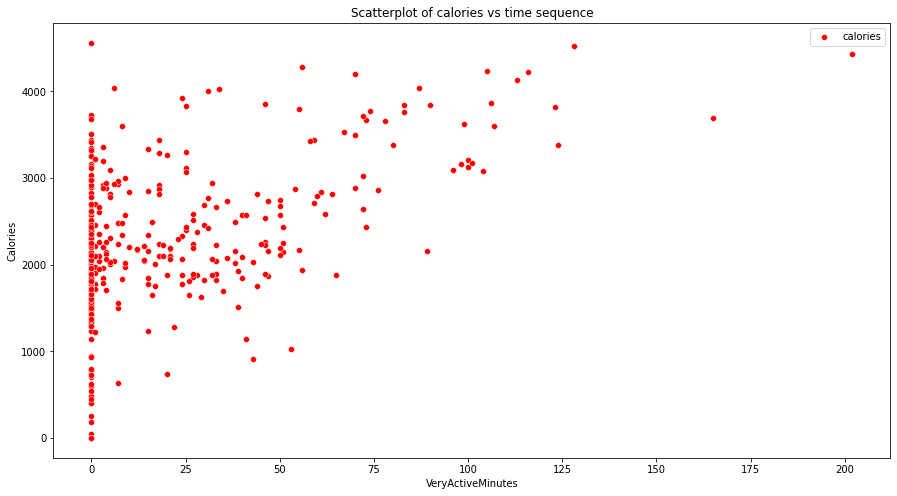

In [65]:
#calories burns on intense time
plt.figure(figsize=(15,8))
sns.scatterplot(x='VeryActiveMinutes', y='Calories', data=df,label='calories',color='red')
plt.legend()
plt.title('Scatterplot of calories vs time sequence')
plt.show()

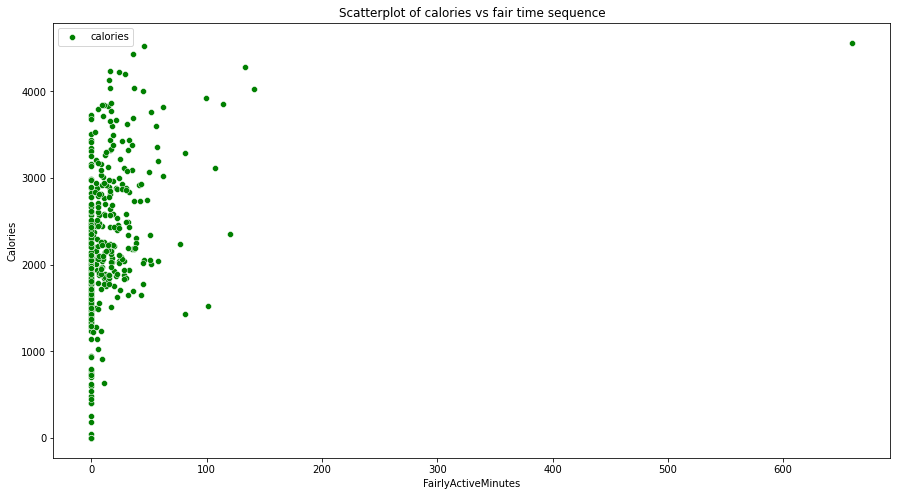

In [71]:
#calories burns on intense time and chart of Scatterplot display calories vs fair time sequence
plt.figure(figsize=(15,8))
sns.scatterplot(x='FairlyActiveMinutes', y='Calories', data=df,label='calories',color='green')
plt.legend()
plt.title('Scatterplot of calories vs fair time sequence')
plt.show()

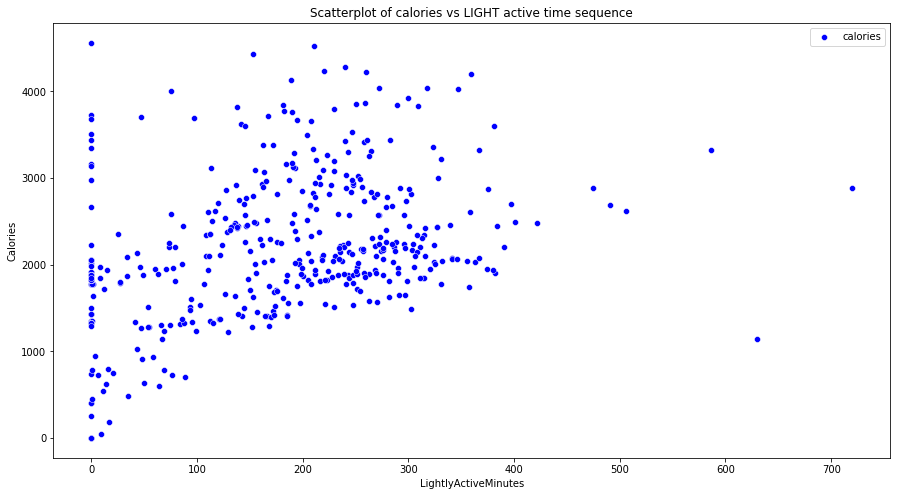

In [70]:
#calories burns on intense time and chart of Scatterplot display calories vs light active time sequence
plt.figure(figsize=(15,8))
sns.scatterplot(x='LightlyActiveMinutes', y='Calories', data=df,label='calories',color='blue')
plt.legend()
plt.title('Scatterplot of calories vs LIGHT active time sequence')
plt.show()

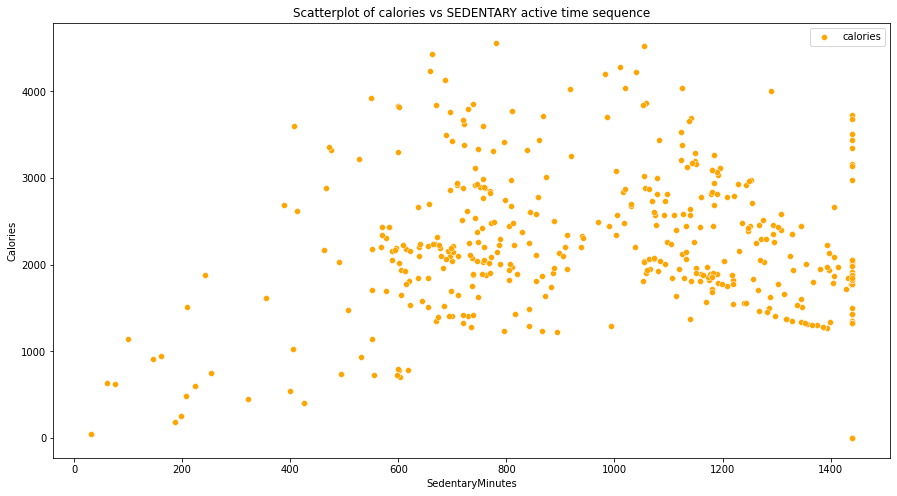

In [69]:
#calories burns on intense time and chart of Scatterplot display calories vs SEDENTARY active time sequence
plt.figure(figsize=(15,8))
sns.scatterplot(x='SedentaryMinutes', y='Calories', data=df,label='calories',color='orange')
plt.legend()
plt.title('Scatterplot of calories vs SEDENTARY active time sequence')
plt.show()

Finally this exploratery data analysis use to estimate the calories burn on  process of distance type and moreover than that predict the calories burn on future on continous flow of activity process which follows ABOVE.